# Benchmark Algo on a simple problem
Minimizing the sinusoidale function between 0 and 2pi

In [1]:
import sys
sys.path.append("../")
from base import benchmark_value
import numpy as np
import matplotlib.pyplot as plt


In [2]:
optimization_problem = [
    {
        "name": "x1",
        "category": "uniform",
        "search_space": {
            "low": 0,
            "high": 10,
        }
    },
    {
        "name": "x1_step",
        "category": "uniform",
        "search_space": {
            "low": 0,
            "high": 10,
            "step": 1
        }
    },
    {
        "name": "x2",
        "category": "loguniform",
        "search_space": {
            "low": 1e4,
            "high": 1e6,
            "base": 10,
        }
    },
    {
        "name": "x2_step",
        "category": "loguniform",
        "search_space": {
            "low": 1e4,
            "high": 1e6,
            "step": 1e3,
            "base": 10,
        }
    },
    {
        "name": "x3",
        "category": "normal",
        "search_space": {
            "mu": 8,
            "sigma": 4,
            "low": 0,
            "high": 10,
        }
    },
    {
        "name": "x3_step",
        "category": "normal",
        "search_space": {
            "mu": 8,
            "sigma": 4,
            "low": 0,
            "high": 10,
            "step": 0.2,
        }
    },
    {
        "name": "x4",
        "category": "lognormal",
        "search_space": {
            "mu": 1e-5,
            "sigma": 1e1,
            "low": 1e-7,
            "high": 1e-3,
            "base": 10,
        }
    },
    {
        "name": "x4_step",
        "category": "lognormal",
        "search_space": {
            "mu": 1e-5,
            "sigma": 1e1,
            "low": 1e-8,
            "high": 1e-3,
            "step": 1e-8,
            "base": 10,
        }
    },
    #{
    #    "name": "x5",
    #    "category": "categorical",
    #    "search_space": {
    #        "values": ["a", "b", "c", "d"],
    #    }
    #},
]


def function_to_optimize(x1,
                         x1_step,
                         x2,
                         x2_step,
                         x3,
                         x3_step,
                         x4,
                         x4_step,
                         #x5
                        ):
    loss = 0
    loss += ((x1 - 5.5) / 5.5) ** 2
    loss += ((x1_step - 5) / 5) ** 2
    loss += ((x2 - 3.75e4) / 3.75e4) ** 2
    loss += ((x2_step - 9.2e4) / 9.2e4) ** 2
    loss += ((x3 - 8.1447) / 8.1447) ** 2
    loss += ((x3_step - 8) / 8) ** 2
    loss += ((x4 - 1.33e-5) / 1.33e-5) ** 2
    loss += ((x4_step - 1.456e-5) / 1.456e-5) ** 2
    # loss += (["a", "b", "c", "d"].index(x5) / (3 + 2 + 1 + 0))
    return loss

target = 0

In [6]:
seeds = list(range(10))

methods = ["random", "parzen_estimator"]

number_of_evaluations = [5, 10, 20, 30, 40, 50, 60, 100, 200]

In [7]:
results = benchmark_value(
    function_to_optimize=function_to_optimize,
    optimization_problem=optimization_problem,
    target=target,
    methods=methods,
    number_of_evaluations=number_of_evaluations,
    seeds=seeds,
    parallel=True,
)

Number of trials: 180


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of 180 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.1min finished


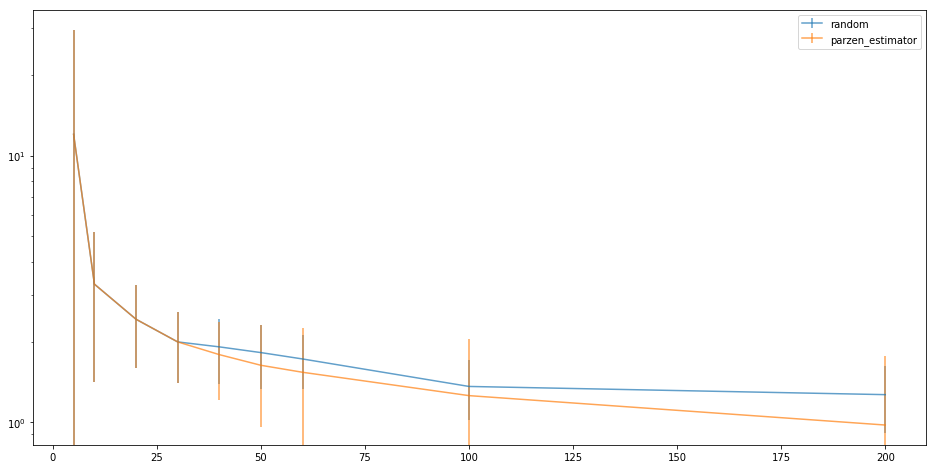

In [8]:
plt.figure(figsize=(16, 8))
for method in methods:
    plt.errorbar(
        x=number_of_evaluations,
        y=[results[method][number_of_evaluation]["mean"] for number_of_evaluation in number_of_evaluations],
        yerr=[results[method][number_of_evaluation]["std"] for number_of_evaluation in number_of_evaluations],
        label=method,
        alpha=0.7
    )
    plt.legend()
    plt.yscale("log")